In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 1000

In [2]:
data = pd.read_csv('sales-data.csv',parse_dates=['barr_date'])
data = data[(data.region_name=="APAC") & (data.business_area_name=="A00 - Equipment")]
data.rename(columns={"barr_date":"date","revenue": "sales"}, inplace=True)
display(data.head())

data = data[['date','sales']]
data.reset_index(drop=True, inplace=True)
data.head()

,business_area_name,region_name,date,sales
65,A00 - Equipment,APAC,2017-01-01,598637.23
71,A00 - Equipment,APAC,2017-02-01,851754.84
114,A00 - Equipment,APAC,2017-03-01,3770869.60
125,A00 - Equipment,APAC,2017-04-01,469003.36
150,A00 - Equipment,APAC,2017-05-01,533723.00


,date,sales
0,2017-01-01,598637.23
1,2017-02-01,851754.84
2,2017-03-01,3770869.60
3,2017-04-01,469003.36
4,2017-05-01,533723.00


In [3]:
data.shape

(60, 2)

<AxesSubplot:xlabel='Date', ylabel='Values'>

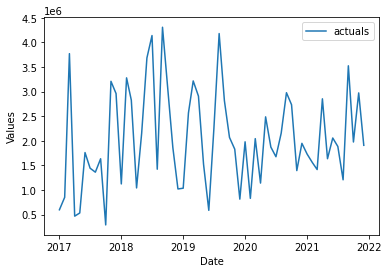

In [4]:
f = Forecaster(y=data['sales'],current_dates=data['date'])
f.plot()

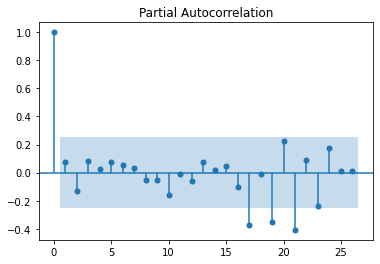

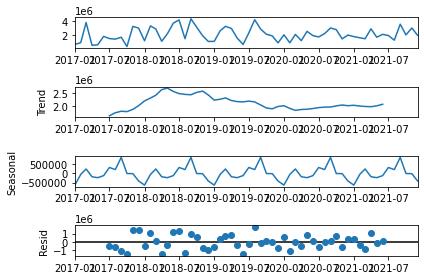

In [5]:
f.plot_pacf(lags=26)
plt.show()

f.seasonal_decompose().plot()
plt.show()

In [6]:
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator('lstm')

Epoch 1/200
1/1 [==============================] - 46s 46s/step - loss: 0.3992 - val_loss: 0.4399
Epoch 2/200
1/1 [==============================] - 0s 298ms/step - loss: 0.3890 - val_loss: 0.4224
Epoch 3/200
1/1 [==============================] - 0s 291ms/step - loss: 0.3715 - val_loss: 0.3926
Epoch 4/200
1/1 [==============================] - 0s 288ms/step - loss: 0.3380 - val_loss: 0.3438
Epoch 5/200
1/1 [==============================] - 0s 279ms/step - loss: 0.2825 - val_loss: 0.2715
Epoch 6/200
1/1 [==============================] - 0s 278ms/step - loss: 0.2064 - val_loss: 0.2999
Epoch 7/200
1/1 [==============================] - 0s 269ms/step - loss: 0.2808 - val_loss: 0.2474
Epoch 8/200
1/1 [==============================] - 0s 250ms/step - loss: 0.1996 - val_loss: 0.2362
Epoch 9/200
1/1 [==============================] - 0s 226ms/step - loss: 0.1640 - val_loss: 0.2527
Epoch 10/200
1/1 [==============================] - 0s 235ms/step - loss: 0.1776 - val_loss: 0.2599
Epoch 11/2

1/1 [==============================] - 0s 279ms/step - loss: 0.1400 - val_loss: 0.2014
Epoch 84/200
1/1 [==============================] - 0s 264ms/step - loss: 0.1400 - val_loss: 0.2007
Epoch 85/200
1/1 [==============================] - 0s 282ms/step - loss: 0.1401 - val_loss: 0.2009
Epoch 86/200
1/1 [==============================] - 0s 264ms/step - loss: 0.1401 - val_loss: 0.2021
Epoch 87/200
1/1 [==============================] - 0s 275ms/step - loss: 0.1402 - val_loss: 0.2022
Epoch 88/200
1/1 [==============================] - 0s 235ms/step - loss: 0.1400 - val_loss: 0.2019
Epoch 89/200
1/1 [==============================] - 0s 227ms/step - loss: 0.1402 - val_loss: 0.2023
Epoch 90/200
1/1 [==============================] - 0s 236ms/step - loss: 0.1399 - val_loss: 0.2026
Epoch 91/200
1/1 [==============================] - 0s 237ms/step - loss: 0.1401 - val_loss: 0.2022
Epoch 92/200
1/1 [==============================] - 0s 244ms/step - loss: 0.1400 - val_loss: 0.2026
Epoch 93/200


1/1 [==============================] - 0s 240ms/step - loss: 0.1399 - val_loss: 0.2016
Epoch 165/200
1/1 [==============================] - 0s 247ms/step - loss: 0.1401 - val_loss: 0.2012
Epoch 166/200
1/1 [==============================] - 0s 247ms/step - loss: 0.1404 - val_loss: 0.2021
Epoch 167/200
1/1 [==============================] - 0s 233ms/step - loss: 0.1401 - val_loss: 0.2035
Epoch 168/200
1/1 [==============================] - 0s 251ms/step - loss: 0.1402 - val_loss: 0.2029
Epoch 169/200
1/1 [==============================] - 0s 236ms/step - loss: 0.1402 - val_loss: 0.2020
Epoch 170/200
1/1 [==============================] - 0s 241ms/step - loss: 0.1403 - val_loss: 0.2014
Epoch 171/200
1/1 [==============================] - 0s 241ms/step - loss: 0.1400 - val_loss: 0.2005
Epoch 172/200
1/1 [==============================] - 0s 250ms/step - loss: 0.1401 - val_loss: 0.2000
Epoch 173/200
1/1 [==============================] - 0s 238ms/step - loss: 0.1404 - val_loss: 0.2004
Epoc

Epoch 46/200
2/2 [==============================] - 1s 304ms/step - loss: 0.1241 - val_loss: 0.1881
Epoch 47/200
2/2 [==============================] - 1s 291ms/step - loss: 0.1240 - val_loss: 0.1930
Epoch 48/200
2/2 [==============================] - 1s 303ms/step - loss: 0.1230 - val_loss: 0.1939
Epoch 49/200
2/2 [==============================] - 1s 303ms/step - loss: 0.1227 - val_loss: 0.1930
Epoch 50/200
2/2 [==============================] - 1s 302ms/step - loss: 0.1231 - val_loss: 0.1940
Epoch 51/200
2/2 [==============================] - 1s 288ms/step - loss: 0.1222 - val_loss: 0.1916
Epoch 52/200
2/2 [==============================] - 1s 291ms/step - loss: 0.1224 - val_loss: 0.1895
Epoch 53/200
2/2 [==============================] - 1s 299ms/step - loss: 0.1231 - val_loss: 0.1903
Epoch 54/200
2/2 [==============================] - 1s 301ms/step - loss: 0.1219 - val_loss: 0.1949
Epoch 55/200
2/2 [==============================] - 1s 287ms/step - loss: 0.1224 - val_loss: 0.1943


2/2 [==============================] - 1s 268ms/step - loss: 0.1223 - val_loss: 0.1959
Epoch 128/200
2/2 [==============================] - 1s 284ms/step - loss: 0.1221 - val_loss: 0.1947
Epoch 129/200
2/2 [==============================] - 1s 277ms/step - loss: 0.1223 - val_loss: 0.1961
Epoch 130/200
2/2 [==============================] - 0s 263ms/step - loss: 0.1219 - val_loss: 0.1998
Epoch 131/200
2/2 [==============================] - 1s 273ms/step - loss: 0.1237 - val_loss: 0.1970
Epoch 132/200
2/2 [==============================] - 1s 273ms/step - loss: 0.1228 - val_loss: 0.1894
Epoch 133/200
2/2 [==============================] - 1s 271ms/step - loss: 0.1228 - val_loss: 0.1893
Epoch 134/200
2/2 [==============================] - 0s 265ms/step - loss: 0.1218 - val_loss: 0.1945
Epoch 135/200
2/2 [==============================] - 1s 281ms/step - loss: 0.1234 - val_loss: 0.1920
Epoch 136/200
2/2 [==============================] - 0s 262ms/step - loss: 0.1223 - val_loss: 0.1864
Epoc

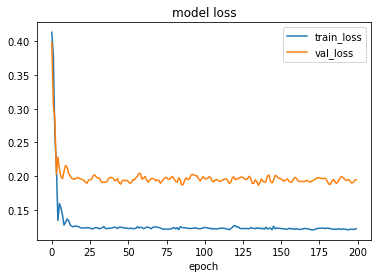

In [7]:
f.manual_forecast(call_me='lstm',
                  lags=24,
                  batch_size=16,
                  epochs=200,
                  validation_split=.20,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(100,)*15,
                  dropout=(0,)*15,
                  plot_loss=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

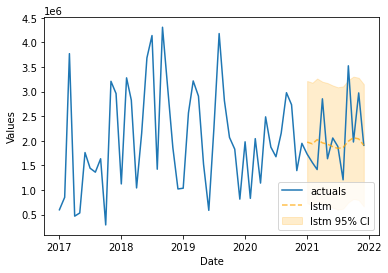

In [8]:
f.plot_test_set(ci=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

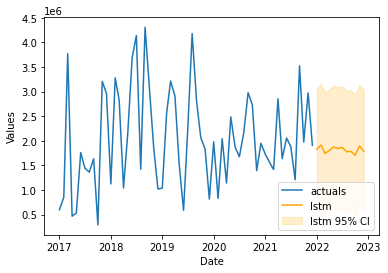

In [9]:
f.generate_future_dates(12)
f.add_time_trend()
f.export(to_excel=True,excel_name='results.xlsx')
f.plot(ci=True)

In [10]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,lstm,0.23,655437.04,0.04,True


In [11]:
test_2021 = f.export_test_set_preds_with_cis('lstm')
display(test_2021.head(12))

predicted_2022 = f.export_forecasts_with_cis('lstm')
display(predicted_2022.head(12))

,DATE,UpperPreds,Preds,Actuals,LowerPreds,ModelNickname,CILevel
0,2021-01-01,3215753.33,1973864.89,1729002.73,731976.45,lstm,0.95
1,2021-02-01,3180183.73,1938295.29,1556731.01,696406.84,lstm,0.95
2,2021-03-01,3265877.19,2023988.75,1415885.53,782100.30,lstm,0.95
3,2021-04-01,3200504.96,1958616.52,2853227.74,716728.07,lstm,0.95
4,2021-05-01,3173790.50,1931902.06,1636227.73,690013.62,lstm,0.95
5,2021-06-01,3124165.54,1882277.10,2056952.79,640388.65,lstm,0.95
6,2021-07-01,3087313.63,1845425.19,1884867.80,603536.74,lstm,0.95
7,2021-08-01,3105610.19,1863721.75,1207677.61,621833.31,lstm,0.95
8,2021-09-01,3233230.22,1991341.77,3524136.31,749453.33,lstm,0.95
9,2021-10-01,3304239.43,2062350.99,1975842.22,820462.54,lstm,0.95


,DATE,UpperForecast,Forecast,LowerForecast,ModelNickname,CILevel
0,2022-01-01,3071009.06,1829120.61,587232.17,lstm,0.95
1,2022-02-01,3155656.13,1913767.68,671879.24,lstm,0.95
2,2022-03-01,2983946.75,1742058.30,500169.86,lstm,0.95
3,2022-04-01,3048548.13,1806659.69,564771.24,lstm,0.95
4,2022-05-01,3116471.93,1874583.49,632695.04,lstm,0.95
5,2022-06-01,3085502.98,1843614.54,601726.09,lstm,0.95
6,2022-07-01,3108700.40,1866811.95,624923.51,lstm,0.95
7,2022-08-01,3021123.99,1779235.55,537347.11,lstm,0.95
8,2022-09-01,3025648.52,1783760.08,541871.63,lstm,0.95
9,2022-10-01,2949277.38,1707388.94,465500.50,lstm,0.95


In [12]:
Total_2021 = test_2021['Actuals'].sum()
Total_2022 = predicted_2022['Forecast'].sum()

Yoy_growth = (Total_2022 - Total_2021)/ Total_2021 * 100

print(f'Total_2021:{Total_2021}')
print(f'Total_2022:{Total_2022}')
print(f'YOY (growth):{Yoy_growth}')

Total_2021:24722297.121428005
Total_2022:21828149.573924616
YOY (growth):-11.706628770329324
